[github ecg project](https://github.com/mondejar/ecg-classification)

[physionet paper](https://physionet.nlm.nih.gov/challenge/2017/Clifford_et-al-challenge_2017_CinC_paper.pdf)

[Beat_Classification code](https://github.com/citiususc/construe/blob/public/Beat_Classification.md)

[resnet code](https://github.com/mist3rr0b0t/Resnet-for-AF-classification)

[ecg knowledge](http://www.medicine-on-line.com/html/ecg/e0001ct_files/05.htm)

In [44]:
import biosppy.signals.ecg as ecg
import pandas as pd
import numpy as np
signals = []
with open("data/X_train.csv") as f_train:
    for line in f_train.readlines()[1:]:
        signals.append(list(map(int, line.split(',')[1:])))
y = []
with open("data/y_train.csv") as f:
    for line in f.readlines()[1:]:
        y.append(int(line.split(',')[1]))
# ecg.ecg(signals[5], 300.0)

In [2]:
# Classify the data
type0 = [signals[i] for i in range(len(y)) if y[i] == 0]
type1 = [signals[i] for i in range(len(y)) if y[i] == 1]
type2 = [signals[i] for i in range(len(y)) if y[i] == 2]
type3 = [signals[i] for i in range(len(y)) if y[i] == 3]

print("The length of type0 is ",len(type0))
print("The length of type1 is ",len(type1))
print("The length of type2 is ",len(type2))
print("The length of type3 is ",len(type3))

The length of type0 is  3030
The length of type1 is  443
The length of type2 is  1474
The length of type3 is  170


In [ ]:
# Have a basic impression of the four types
r0 = ecg.ecg(type0[0], 300.0, show=True)
r1 = ecg.ecg(type1[0], 300.0, show=True)
r2 = ecg.ecg(type2[0], 300.0, show=True)
r3 = ecg.ecg(type3[0], 300.0, show=True)

In [ ]:
r0 = ecg.ecg(type0[8], 300.0, show=True)
r1 = ecg.ecg(type1[8], 300.0, show=True)
r2 = ecg.ecg(type2[8], 300.0, show=True)
r3 = ecg.ecg(type3[8], 300.0, show=True)

r0 = ecg.ecg(type0[28], 300.0, show=True)
r1 = ecg.ecg(type1[28], 300.0, show=True)
r2 = ecg.ecg(type2[28], 300.0, show=True)
r3 = ecg.ecg(type3[28], 300.0, show=True)

In [ ]:
# Compare in the same type
## Type0
r00 = ecg.ecg(type0[5], 300.0, show=True)
r01 = ecg.ecg(type0[50], 300.0, show=True)
r02 = ecg.ecg(type0[500], 300.0, show=True)

In [ ]:
# Compare in the same type
## Type1
r10 = ecg.ecg(type1[30], 300.0, show=True)
r11 = ecg.ecg(type1[5], 200.0, show=True)
r12 = ecg.ecg(type1[200], 300.0, show=True)

In [ ]:
# Compare in the same type
## Type2
r20 = ecg.ecg(type2[4], 300.0, show=True)
r21 = ecg.ecg(type2[40], 300.0, show=True)
r22 = ecg.ecg(type2[400], 300.0, show=True)

In [ ]:
import numpy as np

r20_300 = ecg.ecg(type2[4], 300.0, show=True)
r20_200 = ecg.ecg(type2[4], 200.0, show=True)
r20_100 = ecg.ecg(type2[4], 100.0, show=True)
var300 = np.var(r20_300['templates'])
var200 = np.var(r20_200['templates'])
var100 = np.var(r20_100['templates'])
print("The var of 300 is ",var300, "\n The var 200 is ",var200,"\n The var 100 is ",var100)
# variance(r20['templates'])

In [ ]:
# Compare in the same type
## Type3
r30 = ecg.ecg(type3[4], 300.0, show=True)
r31 = ecg.ecg(type3[40], 300.0, show=True)
r32 = ecg.ecg(type3[107], 300.0, show=True)

In [ ]:
templates = []
with open("data/template.csv") as f_train:
    for line in f_train.readlines()[1:]:
        templates.append(list(line.split(',')))

In [ ]:
len(templates)
len(templates[1])
len(signals)

In [ ]:
# Explore a template
one_temp = templates[4]
max(one_temp)

In [17]:
# Test R peak locations
testcase = signals[5]
rpeak_id_chris = ecg.christov_segmenter(testcase,300)['rpeaks']
#rpeak_id_ecg = ecg.ecg(testcase,300)['rpeaks']
#rpeak_id_eng = ecg.engzee_segmenter(testcase,300)['rpeaks']


In [18]:
# Compare the results of several rpeaks segmenter
rpeak_id_chris_rm = rpeak_id_chris[1:(len(rpeak_id_chris)-1)]
print(rpeak_id_ecg,"\n",rpeak_id_chris,"\n",rpeak_id_eng)

ecg.compare_segmentation(rpeak_id_chris,rpeak_id_eng,300)
#ecg.correct_rpeaks(testcase,rpeak_id_ecg['rpeaks'],300)
#print(testcase[rpeak_id_ecg['rpeaks']],"\n",testcase[rpeak_id_chris_rm])
# testcase[3373]
# find the chris and eng perform similarly

NameError: name 'rpeak_id_ecg' is not defined

In [19]:
rpeak_chris=[]
for id in rpeak_id_chris:
    #print(id)
    rpeak_chris.append(int(testcase[id]))
print(rpeak_chris)


[133, 328, 214, 224, 294, 262, -6, 303, 230, 209, 254, 311, 140, 335, 355, 248, 323, 163, 235, 315, 198, 147, 272, 150, 321, 196, 267, 260, 287, 280]


241.6   77.0249310289
0.36666666666666664


(array([ 1.,  0.,  0.,  1.,  4.,  3.,  4.,  7.,  5.,  5.]),
 array([  -6. ,   30.1,   66.2,  102.3,  138.4,  174.5,  210.6,  246.7,
         282.8,  318.9,  355. ]),
 <a list of 10 Patch objects>)

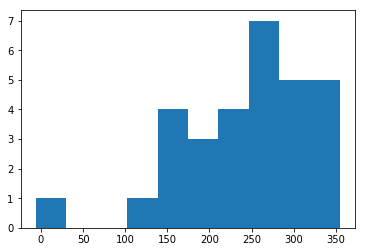

In [20]:
# compute some statistics about R-value
import numpy as np
import matplotlib.pyplot as plt

rpeak_mean = np.mean(rpeak_chris)
rpeak_std = np.std(rpeak_chris)
print(rpeak_mean," ",rpeak_std)

disnormal_ones = [i for i in range(len(rpeak_chris)) if abs(rpeak_chris[i]-rpeak_mean)>rpeak_std]
print(len(disnormal_ones)/len(rpeak_chris))
plt.hist(rpeak_chris)

[297, 300, 298, 237, 366, 330, 277, 301, 303, 304, 301, 320, 237, 342, 306, 300, 323, 278, 307, 307, 301, 301, 305, 309, 310, 305, 301, 307, 310]
302.862068966   24.367479937
0.2413793103448276


(array([  2.,   0.,   0.,   2.,   9.,  11.,   2.,   1.,   1.,   1.]),
 array([ 237. ,  249.9,  262.8,  275.7,  288.6,  301.5,  314.4,  327.3,
         340.2,  353.1,  366. ]),
 <a list of 10 Patch objects>)

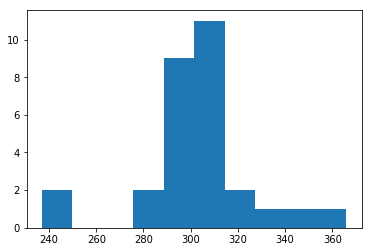

In [21]:
# view the distribution of the interval of R-peaks

rpeak_interval=[]
for i in range(len(rpeak_id_chris)-1):
    rpeak_interval.append(rpeak_id_chris[i+1]-rpeak_id_chris[i])
print(rpeak_interval)

rpeak_id_mean = np.mean(rpeak_interval)
rpeak_id_std = np.std(rpeak_interval)
print(rpeak_id_mean," ",rpeak_id_std)

disnormal_id_ones = [i for i in range(len(rpeak_interval)) if abs(rpeak_interval[i]-rpeak_id_mean)>rpeak_id_std]
print(len(disnormal_id_ones)/len(rpeak_interval))
plt.hist(rpeak_interval)

In [22]:
signals[0][1:20]

[356,
 356,
 356,
 356,
 355,
 354,
 354,
 352,
 351,
 350,
 349,
 347,
 346,
 345,
 343,
 342,
 341,
 340,
 339]

In [23]:
rpeak_id_chris = ecg.christov_segmenter(signals[3],300)['rpeaks']
print(len(signals[3]))
print(rpeak_id_chris)

8776
[425]


In [43]:
#signals_0 = []
#with open("data/x_train_0.csv") as f_train:
#    for line in f_train.readlines()[1:]:
#        signals_0.append(list(map(int, line.split(',')[1:])))
x_test=[]
with open("data/X_test.csv") as f_train:
    for line in f_train.readlines()[1:]:
        x_test.append(list(map(int, line.split(',')[1:])))

In [25]:
def StatFeature(arrays, corrected = False):
    mean = np.mean(arrays)
    std = np.std(arrays)
    disnormal_cnt = 0
    new_array=[]
    for a in arrays:
        if abs(a-mean)>std:
                disnormal_cnt = disnormal_cnt+1
        else:
            new_array.append(a)
    disnormal_ratio = disnormal_cnt/len(arrays)
    if(corrected):
        c_mean = np.mean(new_array)
        c_std = np.std(new_array)
        return [mean,std,disnormal_ratio, c_mean,c_std ]
    return [mean,std,disnormal_ratio]
            
def ExtractRPeakFeature(signals):
    rpeak_int_stats=[]
    rpeak_stats=[]
    for i in range(len(signals)):
        signal = signals[i]
        if(i%50==0):
            print("Processing the ",i/50," batch of 50 signals...")

        rpeak_id_chris = ecg.christov_segmenter(signal,300)['rpeaks']
        rpeak_interval=[]
        rpeaks=[]
        
        if(len(rpeak_id_chris)<4):
            # the mean value, the standard error and the disnormal ratio of intervals
            rpeak_int_stats.append([0,0,0])
            # the mean value, the standard error, the disnormal ratio and the corrected mean value, the corrected standard error.
            rpeak_stats.append([0,0,0,0,0])
            continue
            
        for j in range(len(rpeak_id_chris)-1):
            rpeak_interval.append(rpeak_id_chris[j+1]-rpeak_id_chris[j])
            rpeaks.append(signal[int(rpeak_id_chris[j])])
        
        # Calculate the indices of rpeak_intervals
        rpeak_int_stats.append(StatFeature(rpeak_interval))
        # Calculate the indices of rpeaks
        rpeak_stats.append(StatFeature(rpeaks,corrected=True))
        
    return rpeak_int_stats,rpeak_stats


In [26]:
# Extract features about R-peak
# rpeakIntFeature,rpeakFeature = ExtractRPeakFeature(signals)
test_rpeakIntFeature,test_rpeakFeature = ExtractRPeakFeature(x_test)

Processing the  0.0  batch of 50 signals...


KeyboardInterrupt: 

In [72]:
# Save features about r-peak

#f = open("rpeakfeature.csv", "w")
#f.write("id,rpeakIntMean,rpeakIntStd,rpeakIntOutlier,rpeakMean,rpeakStd,rpeakOutlier,rpeakCorrectedMean,rpeakCorrectedStd\n")
#for i in range(len(rpeakIntFeature)):
#    f.write("{},{},{},{},{},{},{},{},{}\n".format(i, rpeakIntFeature[i][0],rpeakIntFeature[i][1],rpeakIntFeature[i][2],
#                                                  rpeakFeature[i][0],rpeakFeature[i][1],rpeakFeature[i][2],
#                                                  rpeakFeature[i][3],rpeakFeature[i][4]))
#f.close()

f = open("rpeakfeature_test.csv", "w")
f.write("id,rpeakIntMean,rpeakIntStd,rpeakIntOutlier,rpeakMean,rpeakStd,rpeakOutlier,rpeakCorrectedMean,rpeakCorrectedStd\n")
for i in range(len(test_rpeakFeature)):
    f.write("{},{},{},{},{},{},{},{},{}\n".format(i, test_rpeakIntFeature[i][0],test_rpeakIntFeature[i][1],test_rpeakIntFeature[i][2],
                                                  test_rpeakFeature[i][0],test_rpeakFeature[i][1],test_rpeakFeature[i][2],
                                                  test_rpeakFeature[i][3],test_rpeakFeature[i][4]))
f.close()

In [69]:
#len(y)
print(len(test_rpeakIntFeature[3]),len(test_rpeakFeature[3]))

3 5


In [52]:
# Extract other features
!pip install neurokit

  Using cached https://files.pythonhosted.org/packages/6d/9e/09f441055856cfe1ddc3251d2709671eea3d8fc10233fd1ee1ee35124fe0/neurokit-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/25/4b/0570f5c2349f609d969d6ee0a369f7accd67a3369fbf76fce06bfea8419e/cvxopt-1.2.2-cp36-cp36m-win_amd64.whl


In [11]:
import neurokit

# This is a test case
testcase = signals[0]
rpeak_id_chris = ecg.christov_segmenter(testcase,300)['rpeaks']

waves = neurokit.ecg_wave_detector(testcase,rpeak_id_chris)
print(waves.keys())

dict_keys(['T_Waves', 'P_Waves', 'Q_Waves'])


In [27]:
def ExtractWaveFeature(arrays,corrected=True):
    p_waves_stat=[]
    q_waves_stat=[]
    t_waves_stat=[]
    #rTot_stat=[]
    whole_stat=[]
    for j in range(len(arrays)):
        signal = signals[j]
        if(j%50==0):
            print("Processing the ",j/50," batch of 50 signals...")
            
        rpeak = ecg.christov_segmenter(signal,300)['rpeaks']
        waves = neurokit.ecg_wave_detector(signal,rpeak)
        t_waves_id = waves['T_Waves']
        t_waves=[]
        for id in t_waves_id:
            t_waves.append(signal[int(id)])
    
        p_waves_id=waves["P_Waves"]
        p_waves = []
        for id in p_waves_id:
            p_waves.append(signal[int(id)])
    
        q_waves_id=waves["Q_Waves"]
        q_waves = []
        for id in q_waves_id:
            q_waves.append(signal[int(id)])
        
        #r_waves = []
        #for id in rpeak_id_chris:
        #    if()
        #    r_waves.append(testcase[int(id)])
        #
        #print("r len:",len(r_waves),"\t t len:",len(t_waves),"\t p len:",len(p_waves),"\t q len:",len(q_waves))
        #rTot=[]
        #for i in range(len(t_waves)):
        #    if(t_waves[i]==0):
        #        continue
        #    rTot.append(r_waves[i]/t_waves[i])
        
        #rTot_stat.append(StatFeature(rTot,corrected))
        whole_stat.append(StatFeature(signal,corrected))
        if(len(p_waves)==0):
            if(corrected):
                p_waves_stat.append([0,0,0,0,0])
            else:
                p_waves_stat.append([0,0,0])
        else:
            p_waves_stat.append(StatFeature(p_waves,corrected))
            
        if(len(q_waves)==0):
            if(corrected):
                q_waves_stat.append([0,0,0,0,0])
            else:
                q_waves_stat.append([0,0,0])
        else:
            q_waves_stat.append(StatFeature(q_waves,corrected))
            
        if(len(t_waves)==0):
            if(corrected):
                t_waves_stat.append([0,0,0,0,0])
            else:
                t_waves_stat.append([0,0,0])
        else:
            t_waves_stat.append(StatFeature(t_waves,corrected))
        
    features = {"T_Waves_Stat": t_waves_stat,
                 "P_Waves_Stat": p_waves_stat,
                 "Q_Waves_Stat": q_waves_stat,
                 #"rTot_Waves_Stat": rTot_stat,
                 "whole_Stat": whole_stat}
    return features    

In [52]:
test_extra_features['Q_Waves_Stat'][100]

[859.38709677419354,
 803.54029858272202,
 0.3548387096774194,
 1275.25,
 377.44295926669503]

In [51]:
train_extra_features['Q_Waves_Stat'][100]

[859.38709677419354,
 803.54029858272202,
 0.3548387096774194,
 1275.25,
 377.44295926669503]

In [45]:
# Run this cell
train_extra_features = ExtractWaveFeature(signals)
test_extra_features = ExtractWaveFeature(x_test)

Processing the  0.0  batch of 50 signals...
Processing the  1.0  batch of 50 signals...
Processing the  2.0  batch of 50 signals...
Processing the  3.0  batch of 50 signals...
Processing the  4.0  batch of 50 signals...
Processing the  5.0  batch of 50 signals...
Processing the  6.0  batch of 50 signals...
Processing the  7.0  batch of 50 signals...
Processing the  8.0  batch of 50 signals...
Processing the  9.0  batch of 50 signals...
Processing the  10.0  batch of 50 signals...
Processing the  11.0  batch of 50 signals...
Processing the  12.0  batch of 50 signals...
Processing the  13.0  batch of 50 signals...
Processing the  14.0  batch of 50 signals...
Processing the  15.0  batch of 50 signals...
Processing the  16.0  batch of 50 signals...
Processing the  17.0  batch of 50 signals...
Processing the  18.0  batch of 50 signals...
Processing the  19.0  batch of 50 signals...
Processing the  20.0  batch of 50 signals...
Processing the  21.0  batch of 50 signals...
Processing the  22.0

In [50]:
train_extra_features['Q_Waves_Stat'][0]

[-379.71875,
 168.45756779805856,
 0.09375,
 -414.37931034482756,
 32.619450293581131]

In [49]:
test_extra_features['Q_Waves_Stat'][0]

[-379.71875,
 168.45756779805856,
 0.09375,
 -414.37931034482756,
 32.619450293581131]

In [46]:
# Other Features
f = open("otherfeature_simple.csv", "w")
f.write("id,qMean,qStd,tMean,tStd,pMean,pStd,\
        wholeMean,wholeStd,wholeDisnormal,wholeCorrectedMean,wholeCorrectedStd\n")
for i in range(len(train_extra_features['whole_Stat'])):
    f.write("{},{},{},{},{},{},{},{},{},{},{},{}\n".format(i, train_extra_features['Q_Waves_Stat'][i][0],train_extra_features['Q_Waves_Stat'][i][1],\
                                                        train_extra_features['T_Waves_Stat'][i][0],train_extra_features['T_Waves_Stat'][i][1],\
                                                        train_extra_features['P_Waves_Stat'][i][0],train_extra_features['P_Waves_Stat'][i][1],\
                                                        train_extra_features['whole_Stat'][i][0],train_extra_features['whole_Stat'][i][1],\
                                                        train_extra_features['whole_Stat'][i][2],train_extra_features['whole_Stat'][i][3],train_extra_features['whole_Stat'][i][4]))
f.close()

f = open("otherfeature_complete.csv", "w")
f.write("id,qMean,qStd,qDisnormal,qCMean,qCStd,\
        tMean,tStd,tDisnormal,tCMean,tCStd,\
        pMean,pStd,pDisnormal,pCMean,pCStd,\
        wholeMean,wholeStd,wholeDisnormal,wholeCorrectedMean,wholeCorrectedStd\n")
for i in range(len(train_extra_features['whole_Stat'])):
    f.write("{},{},{},{},{},{},\
            {},{},{},{},{},\
            {},{},{},{},{},\
            {},{},{},{},{}\n".format(i, train_extra_features['Q_Waves_Stat'][i][0],train_extra_features['Q_Waves_Stat'][i][1],train_extra_features['Q_Waves_Stat'][i][2],train_extra_features['Q_Waves_Stat'][i][3],train_extra_features['Q_Waves_Stat'][i][4],\
                                                        train_extra_features['T_Waves_Stat'][i][0],train_extra_features['T_Waves_Stat'][i][1],train_extra_features['T_Waves_Stat'][i][2],train_extra_features['T_Waves_Stat'][i][3],train_extra_features['T_Waves_Stat'][i][4],\
                                                        train_extra_features['P_Waves_Stat'][i][0],train_extra_features['P_Waves_Stat'][i][1],train_extra_features['P_Waves_Stat'][i][2],train_extra_features['P_Waves_Stat'][i][3],train_extra_features['P_Waves_Stat'][i][4],\
                                                        train_extra_features['whole_Stat'][i][0],train_extra_features['whole_Stat'][i][1],\
                                                        train_extra_features['whole_Stat'][i][2],train_extra_features['whole_Stat'][i][3],train_extra_features['whole_Stat'][i][4]))
f.close()

f = open("test_otherfeature_complete.csv", "w")
f.write("id,qMean,qStd,qDisnormal,qCMean,qCStd,\
        tMean,tStd,tDisnormal,tCMean,tCStd,\
        pMean,pStd,pDisnormal,pCMean,pCStd,\
        wholeMean,wholeStd,wholeDisnormal,wholeCorrectedMean,wholeCorrectedStd\n")
for i in range(len(test_extra_features['whole_Stat'])):
    f.write("{},{},{},{},{},{},\
            {},{},{},{},{},\
            {},{},{},{},{},\
            {},{},{},{},{}\n".format(i, test_extra_features['Q_Waves_Stat'][i][0],test_extra_features['Q_Waves_Stat'][i][1],test_extra_features['Q_Waves_Stat'][i][2],test_extra_features['Q_Waves_Stat'][i][3],test_extra_features['Q_Waves_Stat'][i][4],\
                                                        test_extra_features['T_Waves_Stat'][i][0],test_extra_features['T_Waves_Stat'][i][1],test_extra_features['T_Waves_Stat'][i][2],test_extra_features['T_Waves_Stat'][i][3],test_extra_features['T_Waves_Stat'][i][4],\
                                                        test_extra_features['P_Waves_Stat'][i][0],test_extra_features['P_Waves_Stat'][i][1],test_extra_features['P_Waves_Stat'][i][2],test_extra_features['P_Waves_Stat'][i][3],test_extra_features['P_Waves_Stat'][i][4],\
                                                        test_extra_features['whole_Stat'][i][0],test_extra_features['whole_Stat'][i][1],\
                                                        test_extra_features['whole_Stat'][i][2],test_extra_features['whole_Stat'][i][3],test_extra_features['whole_Stat'][i][4]))
f.close()

In [ ]:
from sklearn.model_selection import train_test_split


x_train = pd.read_csv("rpeakfeature.csv", header =0,index_col=0)
x_train.describe()

print("Spleating the dataset...")
X_train, X_val, Y_train, Y_val = train_test_split(x_train,y,test_size=0.2)
Y_train_t0 = Y_train[Y_train==0]
Y_train_t1 = Y_train[Y_train==1]
Y_train_t2 = Y_train[Y_train==2]
Y_train_t3 = Y_train[Y_train==3]
print("The number of type0 is ",len(Y_train_t0),
     "\n The number of type1 is ",len(Y_train_t1),
     "\n The number of type2 is ",len(Y_train_t2),
     "\n The number of type3 is ",len(Y_train_t3))

In [ ]:
from sklearn.metrics import accuracy_score, log_loss 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 


def ModelsOnDatasets(datasets, x_train,x_test,y_train,y_test):
    clfs = [ KNeighborsClassifier(4), SVC(kernel="rbf", C=0.025, probability=True), 
                DecisionTreeClassifier(), RandomForestClassifier(),
               AdaBoostClassifier(), GradientBoostingClassifier(), GaussianNB(), 
               LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
    print("The Datasets are: ",datasets)
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols) 
    for clf in clfs: 
        clf.fit(x_train, y_train) 
        name = clf.__class__.__name__ 
        print("="*30,'\n', name)
    
        train_predictions = clf.predict(x_test) 
        cross_val_score(clf,x_train,y_train,scoring='recall_macro', cv=5)
        acc = accuracy_score(y_test, train_predictions) 
        
        train_predictions = clf.predict_proba(x_test) 
        ll = log_loss(y_test, train_predictions) 
        
        # write the item in the log
        #log_entry = pd.DataFrame([[name, acc*100, ll, BMAC]], columns=log_cols) 
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols) 
        log = log.append(log_entry) 
        
    
        print('****Results****') 
        print("Accuracy: {:.4%}".format(acc)) 
        print("Log Loss: {}".format(ll)) 
        print("="*30)
    return log, clfs
    
log=ModelsOnDatasets("Original Datasets",X_train, X_val, Y_train, Y_val)

import seaborn as sns

def plotLog(log):
    sns.set_color_codes("muted") 
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b") 

    plt.xlabel('Accuracy %') 
    plt.title('Classifier Accuracy') 
    plt.show() 

    sns.set_color_codes("muted") 
    sns.barplot(x='Log Loss', y='Classifier', data=log, color="g") 

    plt.xlabel('Log Loss') 
    plt.title('Classifier Log Loss') 
    plt.show()

plotLog(log)